# Exercise 1 (20 points) 

Please state **True** or **False** for the below statements.

- (a) Autoencoders are supervised learning models used primarily for classification tasks.
- (b) The generator in a GAN is trained to distinguish between real and fake data.
- (c) The main objective of an autoencoder is to reconstruct the input data at its output layer.
- (d) In a well-trained GAN, the generator should produce data that the discriminator can easily classify as fake.
- (e) Autoencoders are always better than Principal Component Analysis (PCA) for dimensionality reduction.
- (f) The discriminator and generator are trained simultaneously in a single step during GAN training. 
- (g) Autoencoders are ideally suited for time-series forecasting tasks without any modifications.   
- (h) GANs consist of two neural networks called the generator and the discriminator. 
- (i) A denoising autoencoder is trained to reconstruct corrupted input data back to its original clean version.
- (j) GANs can be used for image generation, text-to-image synthesis, and data augmentation. 

a. False

b. False

c. True

d. False

e. False

f. False

g. False

h. True

i. True

j. True

# Exercise 2 (4 points)

What is the primary goal of an autoencoder?

- (a) Classify input data into predefined categories.
- (b) Translate data from one language to another.
- (c) Compress input data and then reconstruct it.
- (d) Increase the dimensionality of input data,
- (e) None of the above.

C

# Exercise 3 (5 points)

Briefly explain how the generator and discriminator work together in a GAN. Please, be specific.

The generators job is to generate new fake data that resembles the real data while the disciminators job is to distinguish between the real and fake, generated data.

# Exercise 4 (5 points)

Explain how the encoder and decoder work together in an autoencoder. Please, be specific.

The encoder works to compress data into lower dimentional representaion of the input data and the decoder is to reconstruct the original data from the compressed representaion as close to the original as possible. 

# Exercise 5 (4 points)

What differentiates a variational autoencoder (VAE) from a traditional autoencoder? 

- (a) VAEs use convolutional layers only.
- (b) VAEs include a stochastic (probabilistic) component in encoding. 
- (c) VAEs do not reconstruct the input.
- (d) VAEs are supervised models.
- (e) All of the above.

B

# Exercise 6 (4 points)

Which of the following is a common issue encountered when training GANs?

- (a) Vanishing gradients.
- (b) Mode collapse. 
- (c) Overfitting.
- (d) Exploding gradients.
- (e) None of the above.

B

# Exercise 7 (5 points)

How can autoencoders be used for anomaly detection? Please, be specific.

It can be used for this because autoencoders learn the compressed representation of the data where the data primarily contains the normal instances. When anomalies are present the autoencoder can have a more dificult time reconstructing those instances.

# Exercise 8 (4 points)

What does the discriminator output in a GAN typically represent?

- (a) The category of the image.
- (b) The reconstruction loss.
- (c) The probability that input data is real. 
- (d) The latent vector of the input.
- (e) All of the above.

C

# Exercise 9 (5 points)

What is mode collapse in GANs, and why is it problematic? Please, be specific.

It is when the GAN generates similar or identical outputs from different inputs.

# Exercise 10

You are given a credit card transaction dataset with heavy class imbalance (98% normal, 2% fraud). You decide to build an autoencoder using TensorFlow and Keras to detect fraudulent transactions based on reconstruction error.

### Exercise 10(a) (2 points)

Read the `creditcard_sample.csv` data file and called `df`.

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('creditcard_sample.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,0.104133,0.102382,0.886843,-1.255149,0.175365,-2.936201,-2.143967,1.029278,0.674144,-0.729997,...,0.096430,-2.187381,-0.767507,0.563404,-1.466038,0.240488,0.283225,1.699743,-1.224990,0
1,-1.671972,1.406808,0.270513,0.348095,0.759013,0.267136,-1.163003,0.908690,-1.246393,1.419844,...,2.969510,-1.658775,0.505389,0.059963,-0.391300,-1.112186,1.559182,-0.699244,-1.169451,0
2,0.583503,1.564854,0.427985,0.158583,-2.203359,-0.689486,-0.046771,0.444229,0.349199,-0.272738,...,0.493232,0.966601,0.449246,0.532537,1.126343,1.424453,0.998535,-0.871252,-0.124150,0
3,-1.679208,-0.018167,0.777550,-0.081942,0.100049,-0.907496,0.160611,1.893490,0.442753,-0.431100,...,-0.666619,-0.644203,0.222378,0.220145,1.937384,-0.202720,-1.199996,-0.165968,-2.395724,0
4,0.270988,0.068651,0.353680,0.626244,0.558124,1.251149,1.153769,2.354219,-0.585186,-0.176407,...,-0.592114,1.166577,-0.126789,-1.250429,-0.994717,0.761770,1.856416,-1.823493,-2.810645,0


### Exercise 10(b) (2 points)

Report the shape of `df`

In [4]:
df.shape

(2000, 31)

### Exercise 10(c) (6 points)

Define `V1` to `V30` as the input features and `Class` as the target feature. Then, using `StandardScaler`, standardize the input features. Finally, split the data into train (80%) and test (20%). Ensure to include the `stratify` argument in `train_test_split`. 

In [5]:
# define features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Exercise 10(d) (10 points)

Build the autoencoder only on non-fradulent (`Class=0`) observations from the train dataset as follows:

- encoder with two hidden layers with 32 and 32 neurons, respectively.
- decoder with one hidden layer with 32 neurons.
- Compile the model with `Adam(0.001)` and `loss="mse"`

In [6]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, hidden_dim):
        super(Encoder, self).__init__()
        self.hidden_layer1 = Dense(units=hidden_dim, activation="relu")
        self.hidden_layer2 = Dense(units=hidden_dim, activation="relu")

    def call(self, input_features):
        x = self.hidden_layer1(input_features)
        x = self.hidden_layer2(x)
        return x

# Decoder class (one hidden layer with 32 neurons)
class Decoder(tf.keras.layers.Layer):
    def __init__(self, hidden_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = Dense(units=hidden_dim, activation="relu")  
        self.output_layer = Dense(units=original_dim, activation="sigmoid")  

    def call(self, encoded):
        x = self.hidden_layer(encoded)  
        reconstructed = self.output_layer(x)  
        return reconstructed

# Autoencoder class
class Autoencoder(Model):
    def __init__(self, hidden_dim, original_dim):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(hidden_dim=hidden_dim)
        self.decoder = Decoder(hidden_dim=hidden_dim, original_dim=original_dim)

    def call(self, input_features):
        encoded = self.encoder(input_features)  
        reconstructed = self.decoder(encoded) 
        return reconstructed

In [7]:
# non-fraudulent data
X_train_valid = X_train[y_train == 0]

# create an instance of the model
model = Autoencoder(hidden_dim=32, original_dim=30)

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

### Exercise 10(e) (8 points)

Train the autoencoder only on non-fradulent (`Class=0`) observations from the train dataset using `epochs=30`, `batch_size=32`, and `validation_split=0.1`. Visualize the loss in the train and validation datasets.

In [8]:
# train the model
loss = model.fit(X_train_valid, X_train_valid, epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30
44/44 [==============================] - 1s 7ms/step - loss: 1.1827 - val_loss: 1.0927
Epoch 2/30
44/44 [==============================] - 0s 3ms/step - loss: 1.0250 - val_loss: 0.9649
Epoch 3/30
44/44 [==============================] - 0s 2ms/step - loss: 0.9623 - val_loss: 0.9417
Epoch 4/30
44/44 [==============================] - 0s 2ms/step - loss: 0.9333 - val_loss: 0.9130
Epoch 5/30
44/44 [==============================] - 0s 2ms/step - loss: 0.8995 - val_loss: 0.8840
Epoch 6/30
44/44 [==============================] - 0s 2ms/step - loss: 0.8694 - val_loss: 0.8591
Epoch 7/30
44/44 [==============================] - 0s 2ms/step - loss: 0.8442 - val_loss: 0.8369
Epoch 8/30
44/44 [==============================] - 0s 2ms/step - loss: 0.8237 - val_loss: 0.8214
Epoch 9/30
44/44 [==============================] - 0s 2ms/step - loss: 0.8073 - val_loss: 0.8074
Epoch 10/30
44/44 [==============================] - 0s 2ms/step - loss: 0.7932 - val_loss: 0.7945
Epoch 11/30
44/44 [

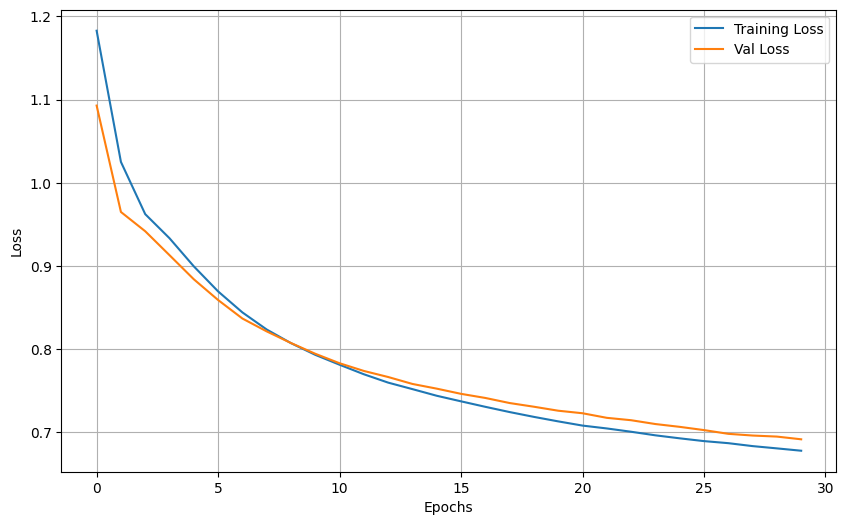

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(30), loss.history['loss'], label='Training Loss')
plt.plot(range(30), loss.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show();

### Exercise 10(f) (6 points)

Use the autoconder to predict on the test data set. Compute the `mse` and store as `reconstruction_error`. Then, visualize the `reconstruction_error`. Comment on the chart.

13/13 [==============================] - 0s 1ms/step


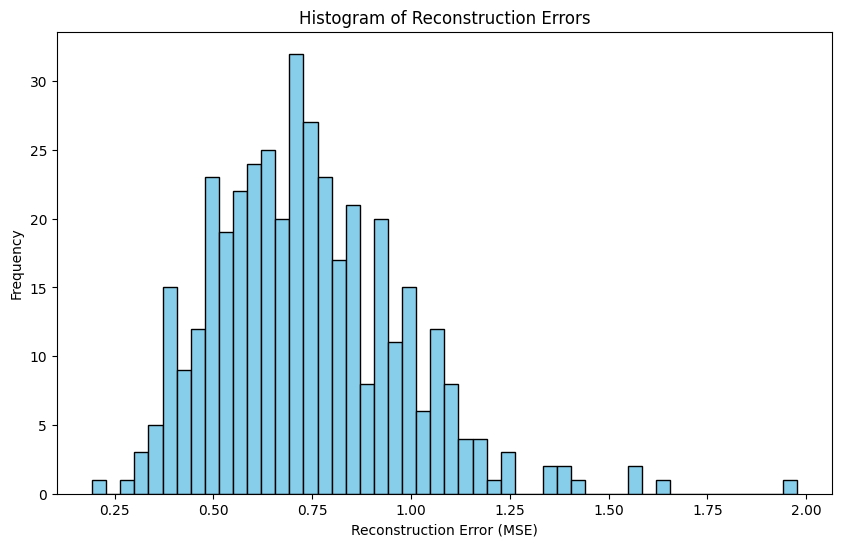

In [ ]:
# predict on the test set
preds = model.predict(X_test)

# Compute the mse 
reconstruction_error = np.mean(np.square(X_test - preds), axis=1)

# Visualize mse
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Reconstruction Errors')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.show()

From the above chart we see a right skew to the reconstruction error with most of error falling around 0.5-0.85

### Exercise 10(g) (6 points)

Use the 98th percentile of the `reconstruction_error` as the threshold to identify suspicious observations in the test dataset. Observations with a `reconstruction_error` exceeding this threshold can be considered outliers. Then, report the confusion matrix of the test data set.

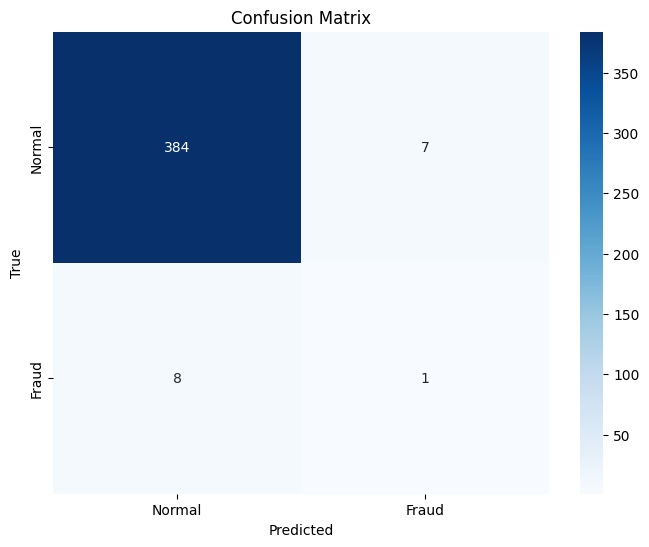

In [13]:
# set a threshold for reconstruction error
threshold = 0.98

# identify anomalies
anomalies = reconstruction_error > np.percentile(reconstruction_error, 98)

# generate a confusion matrix
cm = confusion_matrix(y_test, anomalies)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()